# Online Retail Analysis

In this project, I focused on retail dataset to extract valuable insights 
which can be useful in formulating business strategies. 
The dataset used is from the UCI Machine Learning Repository, 
specifically the [Online Retail dataset]
(https://archive.ics.uci.edu/ml/datasets/online+retail).

## Libraries Used:
- Pandas for data manipulation and analysis.
- Matplotlib and Seaborn for data visualization.
- Collections for alternative container datatypes.
- NumPy for numerical operations.
- mpl_toolkits for additional 3D plotting capabilities.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)
# print(data)

In [3]:
# Tuples and Lists
# Extract list of unique countries that produce the products
countries = list(data['Country'].unique())
#print(countries)

In [4]:
# Extract top 5 most sold and least sold items as tuples
top_items = data.groupby('Description').sum(numeric_only = True)['Quantity'].sort_values(ascending = False).head(10)
top_items_tuples = [(index, value) for index, value in top_items.items()] 
# least_items = data.groupby('Description').sum()['Quantity'].sort_values(ascending = True).head(10)
# least_items_tuples = [(index, value) for index, value in least_items.items()]
# top_items_tuples
# least_items_tuples

In [5]:
# print(data['Quantity'].unique()) ; This part is checked
# grouped_data = data.groupby('Description').sum(numeric_only = True)['Quantity']
# print(grouped_data)
# print(grouped_data.sort_values(ascending = True).head(10))
# print(grouped_data.sort_values(ascending = False).head(10))

In [6]:
# Dictionaries and sets
# Create a dictionary with countries as keys and unique products as values 

In [7]:
country_products = defaultdict(set) # Create a defaultdict to group products by countries.
# After this loop, 'country_products' will have countries as keys and sets of products as values.
for _, row in data.iterrows(): # Iterate over each row in the DataFrame 'data' 
    country_products[row['Country']].add(row['Description']) # For each row, use the 'Country' as the key and add the 'Description' to the corresponding set.    

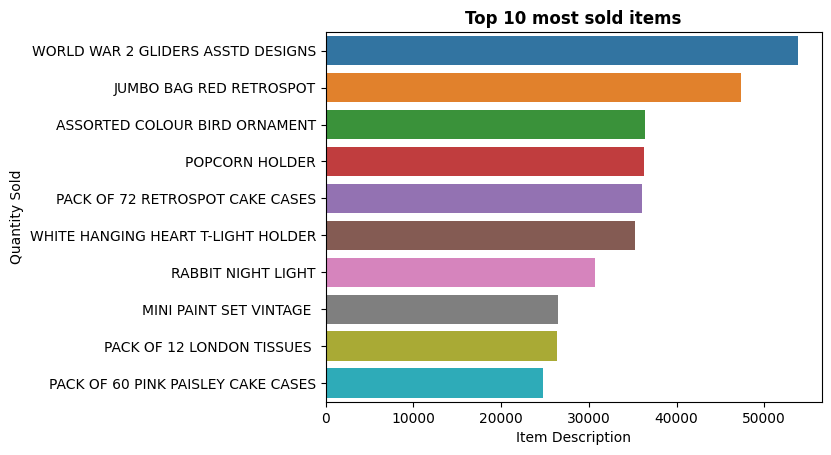

In [8]:
# Visulisation
# Use Seaborn to create a bar plot.
# x-axis: Categories extracted from the first element of each tuple in 'top_items_tuples'.
# y-axis: Values extracted from the second element of each tuple in 'top_items_tuples'.
sns.barplot(x = [item[1] for item in top_items_tuples], y = [item[0] for item in top_items_tuples])
# Set font for all plots
plt.rcParams['font.family'] = 'Arial'
plt.title('Top 10 most sold items', fontweight = 'bold')
plt.xlabel('Item Description')
plt.ylabel('Quantity Sold')
plt.show()

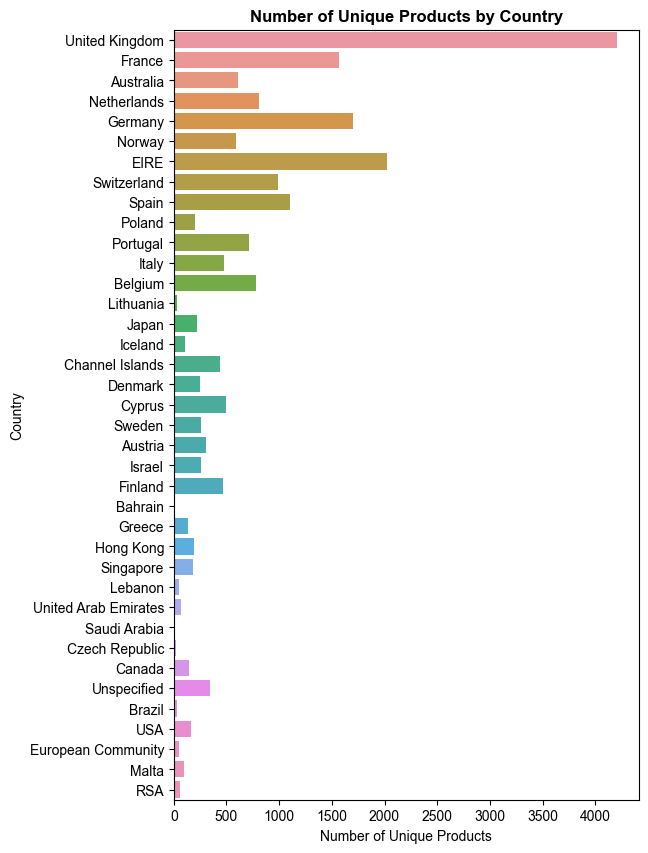

In [9]:
# Number of Unique Products by Country
# Create a dictionary using dictionary comprehension.
# The keys of the dictionary are the countries.
# The values are the count of unique products for each country.
unique_products_count = {country: len(products) for country, products in country_products.items()}
# Set the size of the figure (width, height) in inches for the upcoming plot.
plt.figure(figsize=(6, 10))
# Set the title of the plot, with a bold font weight.
plt.title('Number of Unique Products by Country', fontweight='bold')
# Set the label for the x-axis.
plt.xlabel('Number of Unique Products')
# Set the label for the y-axis.
plt.ylabel('Country')
# Create a horizontal bar plot using Seaborn.
# The x-values are the counts of unique products (values of the unique_products_count dictionary).
# The y-values are the country names (keys of the unique_products_count dictionary).
sns.barplot(x=list(unique_products_count.values()), y=list(unique_products_count.keys()))
# Display the plot.
plt.show()

In [10]:
# Functions
# Define a function to fetch products for a given country
def get_products_by_country(country_name):
    return country_products.get(country_name, set())

In [11]:
# Sample call
print(get_products_by_country('United Kingdom'))

{nan, 'BROWN  PIRATE TREASURE CHEST ', '3D DOG PICTURE PLAYING CARDS', 'RETROSPOT BABUSHKA DOORSTOP', 'RED RETROSPOT BIG BOWL', 'RED RETROSPOT PURSE ', 'ANTIQUE GLASS PLACE SETTING', 'SMOKEY GREY COLOUR GLASS', 'WHITE STITCHED CUSHION COVER', 'ENAMEL BLUE RIM COFFEE CONTAINER', 'NEW BAROQUE LARGE NECKLACE BLK/WHIT', 'ORANGE SCENTED SET/9 T-LIGHTS', 'DRAWER KNOB CERAMIC RED', 'FAWN AND MUSHROOM GREETING CARD', 'JUMBO BAG DOILEY PATTERNS', 'MEDIUM PARLOUR FRAME ', 'JARDIN ETCHED GLASS BUTTER DISH', 'GIANT MEDINA STAMPED METAL BOWL ', 'CLASSIC FRENCH STYLE BASKET NATURAL', 'RECYCLED ACAPULCO MAT PINK', 'DRAWER KNOB CRACKLE GLAZE PINK', "PACK OF 12 50'S CHRISTMAS TISSUES", 'SMALL GLASS HEART TRINKET POT', 'ORIGAMI OPIUM INCENSE/CANDLE SET ', 'GIFT BAG BIRTHDAY', 'DRAWER KNOB CRACKLE GLAZE IVORY', 'ORIENTAL RED CUSHION COVER ', 'did  a credit  and did not tick ret', 'DOORMAT ENGLISH ROSE ', 'WALL ART GARDEN HAVEN ', 'WOVEN ROSE GARDEN CUSHION COVER ', '12 PENCIL SMALL TUBE WOODLAND', 'BOX O

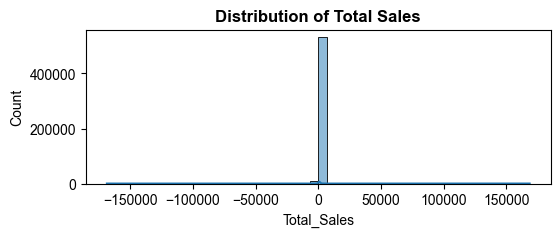

In [12]:
# 1. Total Sales Distribution
# Calculate the total sales by multiplying Quantity and UnitPrice for each row.
data['Total_Sales'] = data['Quantity'] * data['UnitPrice']

# Plot the distribution of total sales.
plt.figure(figsize=(6, 2)) # 
sns.histplot(data=data, x='Total_Sales', bins=50, kde=True) # 
plt.title('Distribution of Total Sales', fontweight = 'bold') # 
plt.show() # 

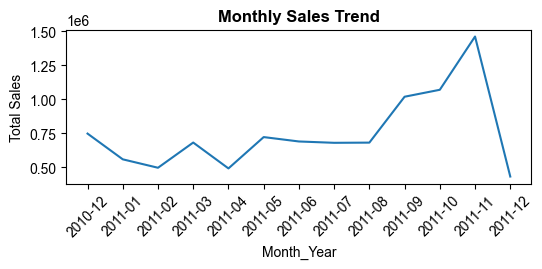

In [13]:
# 2. Monthly Sales Trend
# Convert the InvoiceDate to a datetime format and extract the month and year.
data['Month_Year'] = data['InvoiceDate'].dt.strftime('%Y-%m') # 

# Group by Month_Year and sum the TotalSales.
monthly_sales = data.groupby('Month_Year').sum(numeric_only = True)['Total_Sales'] # 
plt.figure(figsize=(6, 2)) # 
sns.lineplot(x = monthly_sales.index, y = monthly_sales.values) # 
plt.title('Monthly Sales Trend', fontweight = 'bold') # 
plt.xticks(rotation = 45) # 
plt.ylabel('Total Sales') # 
plt.xlabel('Month_Year')
plt.show() # 

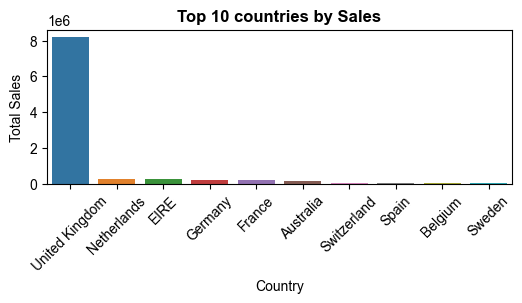

In [14]:
# 3. Top 10 Countries by Sales
# Group by Country and sum the TotalSales.
country_sales = data.groupby('Country').sum(numeric_only = True)['Total_Sales']
# Get the top 10 countries by sales.
top_countries = country_sales.sort_values(ascending = False).head(10)
plt.figure(figsize = (6, 2))
sns.barplot(x = top_countries.index, y = top_countries.values)
plt.title('Top 10 countries by Sales', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.ylabel('Total Sales')
plt.show()

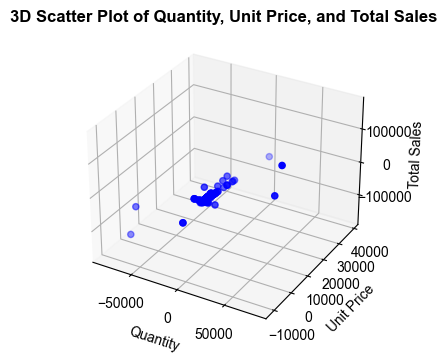

In [15]:
# 1. 3D Scatter Plot of Quantity, Unit Price, and Total Sales
fig = plt.figure(figsize = (8, 4))
# Add a subplot to the figure with 3D projection.
ax = fig.add_subplot(111, projection = '3d')
# Create a scatter plot on the 3D axes. Colors the markers blue and uses circle markers.
ax.scatter(data['Quantity'], data['UnitPrice'], data['Total_Sales'], c= 'blue', marker = 'o')
# Set the x-axis label to 'Quantity'.
# Adjust the position of axis labels
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.zaxis.set_label_coords(-0.1, 0.5)
ax.set_xlabel('Quantity')
# Set the y-axis label to 'Unit Price'.
ax.set_ylabel('Unit Price')
# Set the z-axis label to 'Total Sales'.
ax.set_zlabel('Total Sales')
# Set the title for the 3D plot.
ax.set_title('3D Scatter Plot of Quantity, Unit Price, and Total Sales', fontweight = 'bold')
# Display the plot.
plt.show()

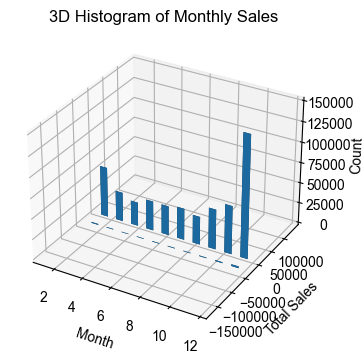

In [17]:
# 3D Histogram of Monthly Sales
# Create another figure object with specified size.
fig = plt.figure(figsize = (8, 4))
# Add another 3D subplot to the new figure.
ax = fig.add_subplot(111, projection = '3d')
# Calculate the 2D histogram data for InvoiceDate and TotalSales with 10 bins.
hist, xedges, yedges = np.histogram2d(data['InvoiceDate'].dt.month, data['Totla_Sales'], bins = 10)
# Define the position of each bar in 3D space.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")

# Flatten the arrays.
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Define the dimensions of the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

# Plot the 3D histogram using the bar3d function.
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# Set the axis labels and plot title.
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_zlabel('Count')
ax.set_title('3D Histogram of Monthly Sales')

# Display the 3D histogram plot.
plt.show()